# Kimiya Ghanai Machine Learning

## K-Means Clustering for customer dataset

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## import custuomer dataset

In [30]:
df= pd.read_csv('customer_dataset.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,NaN,77.0
4,5,Female,31.0,17.0,NaN


## Normalizing data

In [31]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Annual_Income_(k$)'] = df['Annual_Income_(k$)'].fillna(df['Annual_Income_(k$)'].mean())
df['Spending_Score'] = df['Spending_Score'].fillna(df['Spending_Score'].mean())

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
x = df[['Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Prediction with K-means

In [59]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0)
df['Cluster'] = km.fit_predict(x_scaled)
centers = km.cluster_centers_

## Plotting K-Means Clusters for Age and Spending score

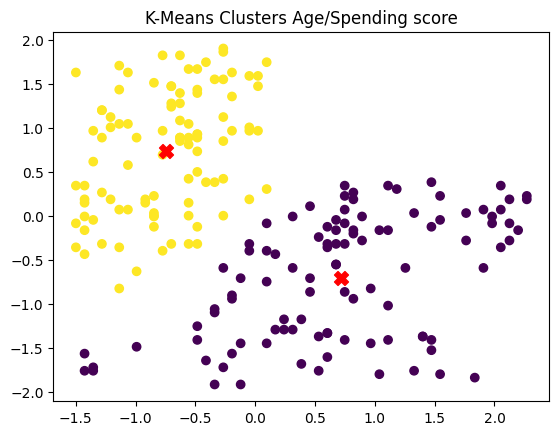

In [66]:
plt.scatter(x_scaled[:, 1], x_scaled[:, 3], c=df['Cluster'])
plt.scatter(centers[:, 1], centers[:, 3], c='red', s=100, marker='X')
plt.title("K-Means Clusters Age/Spending score")
plt.show()